# Overview
This notebook creates visualizations for the systematic review of automotive demand models

# Setup

## Install libraries

In [53]:
# !pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np


## Load files

In [54]:
file = pd.ExcelFile('Scopus_Articles_2019-2023.xlsx')
full_works = file.parse('Works')
works = full_works.dropna(subset=['Model Class']).__deepcopy__()
non_exclusive_journals = file.parse('Journal Fields')

## Clean columns

In [55]:
# Change labels
works['Model Class'] = ["Random Utility" if x == "RUM" else x for x in works['Model Class']]
works['Model Class'] = ["Other Statistical" if x == "Other Stat" else x for x in works['Model Class']]
works['Model Class'] = ["Classical Utility" if x == "UM" else x for x in works['Model Class']]
works['Model Class'] = ["Other Demand Model" if x == "Other" else x for x in works['Model Class']]
works['Model Class'] = ["Machine Learning" if x == "ML" else x for x in works['Model Class']]
works['Model Class'] = ["Other Discrete Choice" if x == "Other DCM" else x for x in works['Model Class']]
works['Model Class'] = ["Hybrid" if x == "Hybrid" else x for x in works['Model Class']]
works['Model Class'] = ["Diffusion-Rate" if x == "Diff" else x for x in works['Model Class']]
works['Model Class'] = ["Agent-Based" if x == "ABM" else x for x in works['Model Class']]
works['Model Class'] = ["Evolutionary Game Theory" if x == "EGT" else x for x in works['Model Class']]
works['Model Class'] = ["System Dynamics" if x == "SD" else x for x in works['Model Class']]
works['Model Class'] = ["Multiple Models Used" if x == "Multiple" else x for x in works['Model Class']]

model_class = works['Model Class'].value_counts()
print(model_class)

Random Utility              200
Other Statistical            41
Hybrid                       33
Classical Utility            26
Other Demand Model           24
Machine Learning             22
Other Discrete Choice        19
Diffusion-Rate               17
Evolutionary Game Theory     14
Multiple Models Used          6
Agent-Based                   6
System Dynamics               3
Name: Model Class, dtype: int64


# Summary

In [56]:
count_search = len(full_works)
count_screened = len(full_works['Sought for retrieval'])
count_excluded_abstract = sum(full_works['Sought for retrieval'] == 'N')
count_sought = sum(full_works['Sought for retrieval'] == 'Y')
count_not_retrieved = sum(full_works['Retrieved'] == 'N')
count_assessed = sum(full_works['Retrieved'] == 'Y')
count_no_model = sum(full_works['Relevant'] == 'N')
count_model = sum(full_works['Relevant'] == 'Y')

# print(count_no_model)
# full_works['Retrieved']
count_excluded_abstract + count_not_retrieved + count_no_model + count_model - count_search

print('n=' + str(count_search) +' - Articles identified in Scopus search')
print('n=' + str(count_screened) +' - Abstracts screened')
print('n=' + str(count_excluded_abstract) +' - Works excluded by abstract')
print('n=' + str(count_sought) +' - Full articles sought for retrieval')
print('n=' + str(count_not_retrieved) +' - Full article not retrieved')
print('n=' + str(count_assessed) +' - Articles assessed for eligibility')
print('n=' + str(count_no_model) +' - Articles excluded, did not model automotive demand')
print('n=' + str(count_model) +' - Articles included in review')

n=1648 - Articles identified in Scopus search
n=1648 - Abstracts screened
n=867 - Works excluded by abstract
n=781 - Full articles sought for retrieval
n=10 - Full article not retrieved
n=771 - Articles assessed for eligibility
n=360 - Articles excluded, did not model automotive demand
n=411 - Articles included in review


# Pie Charts

## Pie of Model Classes

Total Count: 411


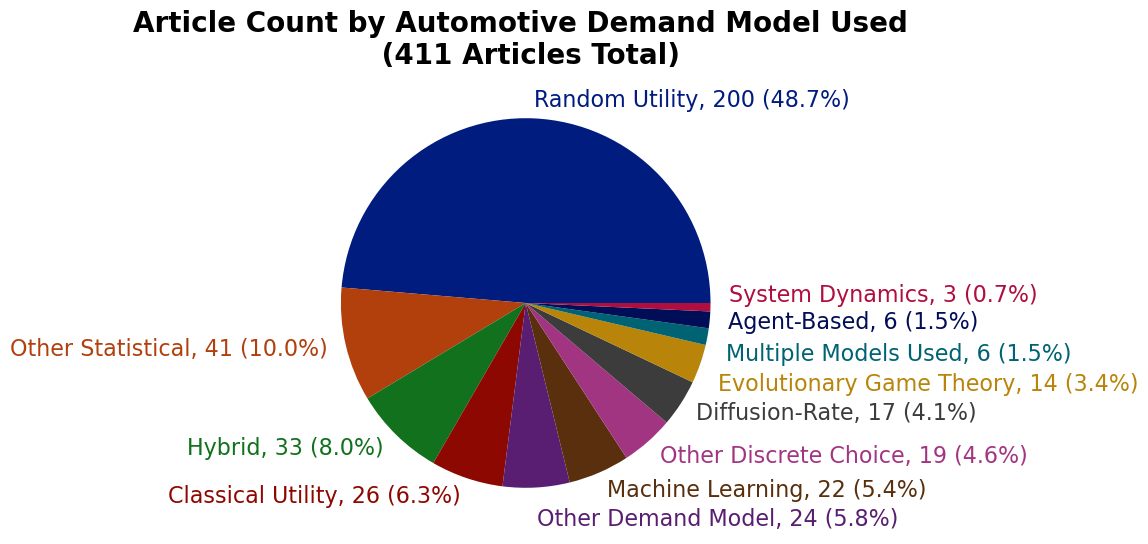

In [57]:
# Define mutually exclusive model classes
model_class = works['Model Class'].value_counts()
percentage = 100 * model_class / model_class.sum()

# Create labels 
model_types = model_class.index.to_list()
labels1 = [f'{i}, {j} ({k:.1f}%)' if j > 2 else '' for i,j,k in zip(model_types, model_class.values, percentage)]

# Adjust position of labels for legibility
labels1[4] = '\n'+labels1[4]
# labels1[5] = '\n'+labels1[5]
labels1[8] = '\n'+labels1[8]
labels1[9] = '\n'+labels1[9]
# labels1[10] = labels1[10]+'\n'
labels1[11] = labels1[11]+'\n'

# Set custom colors for the labels in ax1 using Seaborn's dark palette
num_slices = len(model_class)
color_palette = sns.color_palette('dark', n_colors=num_slices)
# Avoid repeat colors
color_palette[-2] = (0.0, 0.05, 0.34)
color_palette[-1] = (0.69, 0.05, 0.25)

# Create subplots
fig, ax1 = plt.subplots(figsize=(14, 6))  # Increased figsize

# Plot the first pie chart in ax1
wedges, texts = ax1.pie(model_class, textprops={'fontsize': 16}, labels=labels1, colors=color_palette)
# ax1.set_title('Automotive Demand Model Used in Relevant Works \n (' + str(sum(model_class)) + ' Works Total)',footsie=20)
ax1.set_title('Article Count by Automotive Demand Model Used \n (' + str(sum(model_class)) + ' Articles Total)', fontsize=20, fontweight='bold')

# 'Relevant Works and Their Automotive Demand Model'
# dark_palette = sns.color_palette('dark')
for text, color in zip(texts, color_palette):
    text.set_color(color)

print("Total Count: " + str(sum(model_class)))

## Pie of RUMs

RUM Count: 220
Traditional RUM Count: 211
RUM Equivalent:9


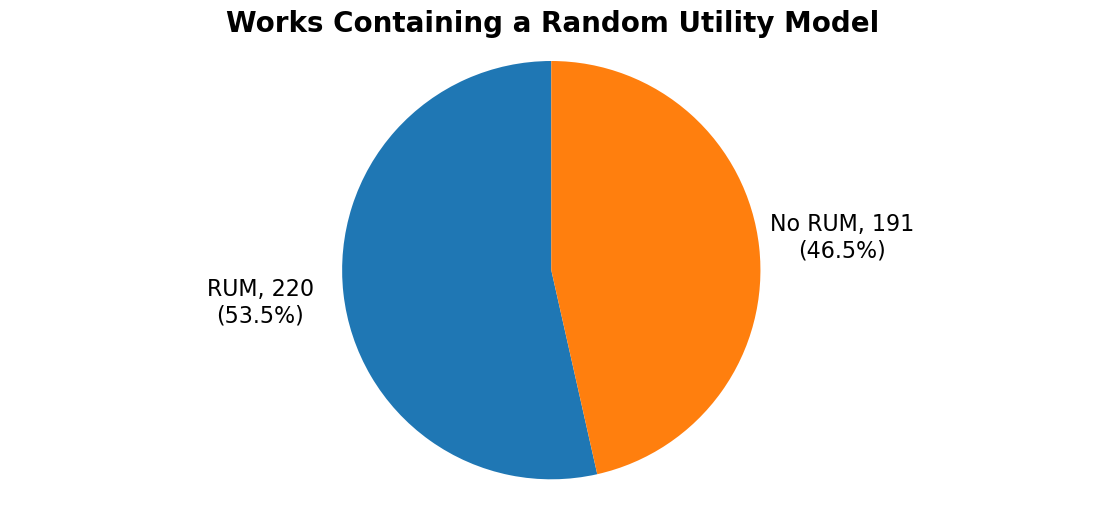

In [58]:
# Models containing a RUM
models = works[works['Model Class'].notnull()]
rum_eq = (models['RUM Type'] == 'RUM equivalent').sum()
is_rum = models['RUM Type'].notnull().sum()
n_models = len(models)
pct_rum = (is_rum / n_models) * 100
pct_non_rum = (n_models - is_rum) / n_models * 100

print("RUM Count: " + str(models['RUM Type'].notnull().sum()))
print("Traditional RUM Count: " + str(models['RUM Type'].notnull().sum() - rum_eq))
print("RUM Equivalent:" + str(rum_eq))
# Create labels for the second pie chart
labels2 = 'RUM', 'No RUM'
counts = [is_rum, n_models - is_rum]
sizes = [pct_rum, pct_non_rum]
labels2 = [f'{i}, {j}\n({k:.1f}%)' for i,j,k in zip(labels2, counts, sizes)]

# Create subplots
fig, ax2 = plt.subplots(figsize=(14, 6))  # Increased figsize
ax2.pie(sizes, labels=labels2, labeldistance=1.4, textprops={'fontsize': 16, 'ha': 'center'}, startangle=90) #, colors=sns.color_palette('pastel'))
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Works Containing a Random Utility Model', fontsize=20, fontweight='bold')
plt.show()

RUM Count: 220
Traditional RUM Count: 211
RUM Equivalent:9


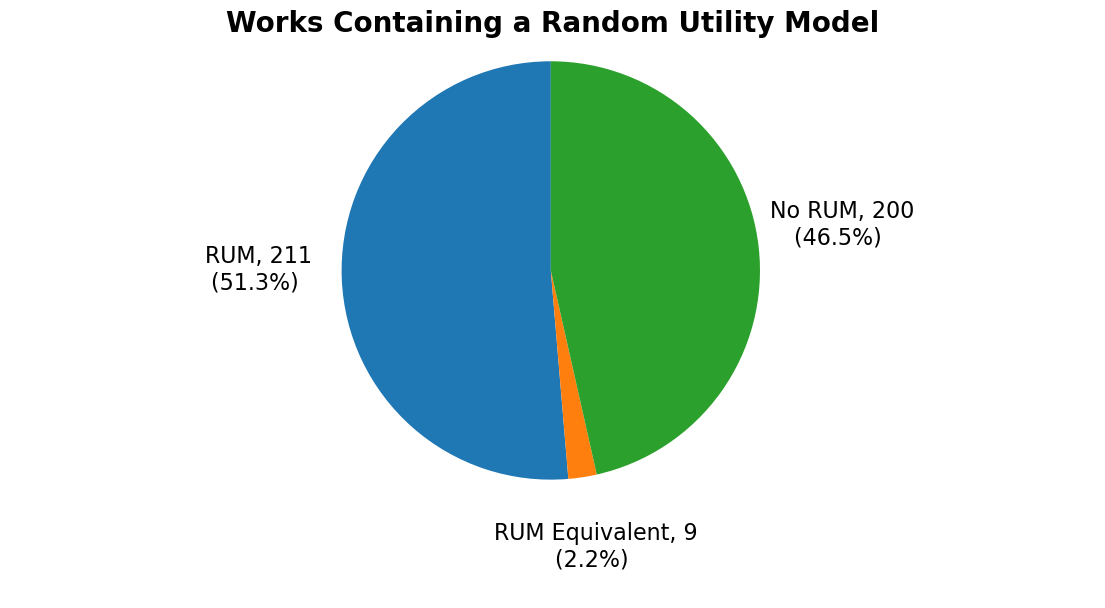

In [59]:
# Models containing a RUM
models = works[works['Model Class'].notnull()]
rum_eq = (models['RUM Type'] == 'RUM equivalent').sum()
is_rum = models['RUM Type'].notnull().sum() - rum_eq
non_rum_eq = len(models) - is_rum - rum_eq
n_models = len(models)
pct_rum = is_rum / n_models * 100
pct_rum_eq = rum_eq / n_models * 100
pct_non_rum = non_rum_eq / n_models * 100

print("RUM Count: " + str(models['RUM Type'].notnull().sum()))
print("Traditional RUM Count: " + str(models['RUM Type'].notnull().sum() - rum_eq))
print("RUM Equivalent:" + str(rum_eq))
# Create labels for the second pie chart
labels2 = 'RUM', 'RUM Equivalent','No RUM'
counts = [is_rum, rum_eq, n_models - is_rum]
sizes = [pct_rum, pct_rum_eq, pct_non_rum]
labels2 = [f'{i}, {j}\n({k:.1f}%) \n' for i,j,k in zip(labels2, counts, sizes)]

# Create subplots
fig, ax2 = plt.subplots(figsize=(14, 6))  # Increased figsize
ax2.pie(sizes, labels=labels2, labeldistance=1.4, textprops={'fontsize': 16, 'ha': 'center'}, startangle=90) #, colors=sns.color_palette('pastel'))
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('Works Containing a Random Utility Model', fontsize=20, fontweight='bold')
plt.show()

# Stacked Bar Charts by Field

## Model Classes by Field

### Create dataframe of model classes by field

In [60]:
# Create indicator columns for non-mutually exclusive fields
# field_names = non_exclusive_journals.columns[1:].tolist()
# print(field_names)
field_names = ['Energy/Environment', 'Transportation', 'Economics', 'Other']

for index, row in works.iterrows():
    # Find matching journal in the non_exclusive_journals DataFrame
    matching_journal = non_exclusive_journals.loc[non_exclusive_journals['Journal'] == row['Source title']]
    
    # Add indicators for each field/column
    for field in field_names:
        works.at[index, field] = matching_journal[field].iloc[0] if not matching_journal.empty else None

grouped = works.groupby('Model Class')[field_names].apply(lambda x: x.notna().sum())

# Calculate the sum of each column and then sort the columns based on these sums
sums = grouped.sum().sort_values(ascending=False)

# Calculate the total sum of each model across all fields
model_totals = grouped.sum(axis=1)
# Sort models based on their total sum (prevalence)
sorted_models = model_totals.sort_values(ascending=False).index

# Reorder the rows of grouped DataFrame based on the sorted models
grouped_sorted = grouped.loc[sorted_models]
grouped['Total'] = model_class


# Calculate the total sum of each model across all fields
model_totals = grouped.sum(axis=1)

# Sort models based on their total sum (prevalence)
sorted_models = model_totals.sort_values(ascending=False).index

# Reorder the rows of grouped DataFrame based on the sorted models
grouped_sorted = grouped.loc[sorted_models]

# Calculate the total count for each field
field_totals = grouped_sorted.sum()

# Calculate percentages
grouped_percent = grouped_sorted.div(grouped_sorted.sum(axis=0), axis=1) * 100

In [61]:
grouped_sorted

,Energy/Environment,Transportation,Economics,Other,Total
Model Class,,,,,
Random Utility,95,100,27,26,200
Other Statistical,26,7,11,6,41
Hybrid,21,11,1,7,33
Classical Utility,10,10,5,6,26
Other Demand Model,14,2,2,8,24
Machine Learning,7,4,1,12,22
Other Discrete Choice,13,3,1,4,19
Diffusion-Rate,9,2,0,7,17
Evolutionary Game Theory,8,1,0,5,14


In [62]:
grouped_percent

,Energy/Environment,Transportation,Economics,Other,Total
Model Class,,,,,
Random Utility,44.811321,69.444444,55.102041,30.952381,48.661800
Other Statistical,12.264151,4.861111,22.448980,7.142857,9.975669
Hybrid,9.905660,7.638889,2.040816,8.333333,8.029197
Classical Utility,4.716981,6.944444,10.204082,7.142857,6.326034
Other Demand Model,6.603774,1.388889,4.081633,9.523810,5.839416
Machine Learning,3.301887,2.777778,2.040816,14.285714,5.352798
Other Discrete Choice,6.132075,2.083333,2.040816,4.761905,4.622871
Diffusion-Rate,4.245283,1.388889,0.000000,8.333333,4.136253
Evolutionary Game Theory,3.773585,0.694444,0.000000,5.952381,3.406326


### Plot stacked bar of model classes by field

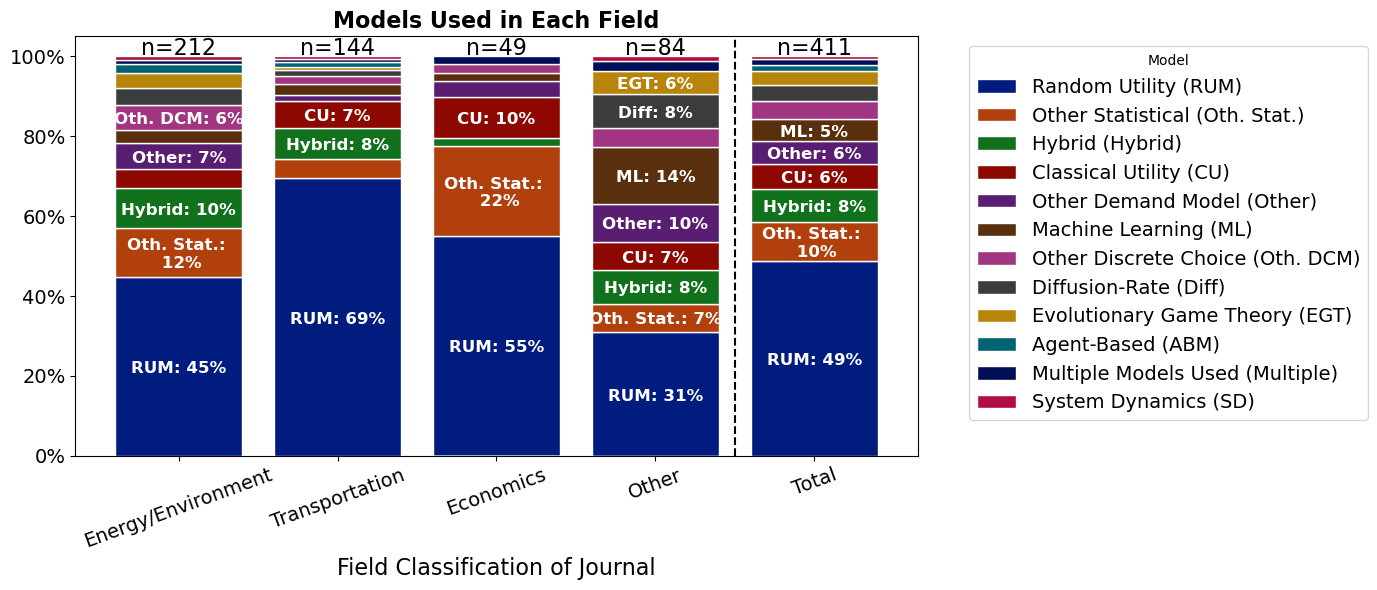

In [63]:
# Plotting stacked bar chart with sorted models and percentages
ax = grouped_percent.T.plot(kind='bar', stacked=True, figsize=(14, 6), fontsize=14, color=color_palette,edgecolor='white', width=0.8)
# yvals = ax.get_yticks()
# ax.set_yticklabels(["{:,.0%}".format(y) for y in yvals], fontsize=12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Models Used in Each Field', fontsize=16, fontweight='bold')
plt.xlabel('Field Classification of Journal', fontsize=16)
# plt.ylabel('Percentage')
plt.xticks(rotation=20)

# Cumulative sum for label positioning
cum_values = np.zeros(len(grouped_percent.columns))

# Add labels within each stack
label_abr = ['RUM', 'Oth. Stat.', 'Hybrid', 'CU', 'Other', 'ML', 'Oth. DCM', 'Diff', 'EGT', 'ABM', 'Multiple', 'SD']
for i, col in enumerate(grouped_percent.index):
    for j in range(len(grouped_percent.columns)):
        value = grouped_percent.loc[col, grouped_percent.columns[j]]
        # Mid-point of the current bar segment
        mid_point = cum_values[j] + value / 2 - 0.5
        if value > 5:  # Only add labels to non-zero segments
            # label_text = f'{col}: {value:.1f}%'
            # label_text = f'{col}'
            label_text = f'{label_abr[i]}: {value:.0f}%'
            if i == 1 and value>=9.5:
                label_text = f'{label_abr[i]}: \n {value:.0f}%'
            ax.text(j, mid_point, label_text, ha='center', va='center', fontsize=12, color='white', fontweight='bold')
        cum_values[j] += value


# Place legend outside the plot
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

# Updating legend labels with abbreviations
handles, labels = ax.get_legend_handles_labels()
new_labels = [f'{labels[i]} ({label_abr[i]})' for i in range(len(labels))]
plt.legend(handles, new_labels, title='Model', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

# Calculate the position of the 100% line
line_position = grouped_percent.sum(axis=0).max() -1
# Add total count above each bar
for i, total in enumerate(field_totals):
    ax.text(i, line_position, f'n={total}', ha='center', va='bottom', fontsize=16)

# Draw vertical line before the last bar
x_pos_for_line = len(field_totals) - 1.5  # Adjust this value as needed
ax.axvline(x=x_pos_for_line, color='k', linestyle='--')  # 'k' for black color, '--' for dashed line


plt.tight_layout()
plt.show()

## Stacked Bar of RUMs

### Rename Columns

In [64]:
models.rename(columns={'MNL': 'Simple Logit'}, inplace=True)
models.rename(columns={'NL': 'Nested Logit'}, inplace=True)
models.rename(columns={'LCL': 'Latent Class Logit'}, inplace=True)
models.rename(columns={'MXL': 'Mixed Logit'}, inplace=True)
models.rename(columns={'PRB': 'Probit'}, inplace=True)
models.rename(columns={'HCM/ICLV': 'Hybrid Choice Model'}, inplace=True)

### Calculate RUM counts by field

In [65]:
non_exclusive_journals.replace({'x': True, pd.NA: False}, inplace=True)
journals_dict = non_exclusive_journals.set_index('Journal').to_dict(orient='index')
# field_names = list(non_exclusive_journals.columns[1:])

## Add field column to models
# Function to retrieve fields for a given journal name
def get_fields(journal_name):
    return journals_dict.get(journal_name, {})

# Apply the function to create new columns for each field in journals_dict
models['Transportation'] = models['Source title'].apply(lambda x: get_fields(x).get('Transportation', False))
models['Economics'] = models['Source title'].apply(lambda x: get_fields(x).get('Economics', False))
models['Energy/Environment'] = models['Source title'].apply(lambda x: get_fields(x).get('Energy/Environment', False))
models['Other'] = models['Source title'].apply(lambda x: get_fields(x).get('Other', False))

# Add total column
models['Total'] = True
field_names.append('Total')

# Get RUM indicies
first_rum_name = 'Simple Logit'
last_rum_name = 'Other RUM'
first_rum_col = models.columns.get_loc(first_rum_name)
last_rum_col = models.columns.get_loc(last_rum_name) + 1
rum_col_names = models.columns[first_rum_col:last_rum_col] 

# Initialize an empty DataFrame to store the counts
field_counts_df = pd.DataFrame(index=rum_col_names, columns=field_names)


# Iterate over each rum class
for rum_class_item in rum_col_names:
    # Iterate over each field name
    for field_name in field_names:
        # Filter the models DataFrame for non-NA entries in the 'MNL' column and the current field
        filtered_df = models[models[field_name]]
        
        # Count the number of non-NA entries for the current field and rum class
        count = filtered_df[rum_class_item].count()
        
        # Assign the count to the corresponding field and rum class in the field_counts_df
        field_counts_df.loc[rum_class_item, field_name] = count

# Rename the first row from 'Multinomial Logit' to 'Logit'
field_counts_df = field_counts_df.rename(index={'Multinomial Logit': 'Logit'})

field_counts_df_transposed = field_counts_df.transpose()

# Calculate percentages
field_pct = field_counts_df.transpose()
field_pct = field_pct.div(field_pct.sum(axis=1), axis=0) * 100

In [66]:
field_counts_df

,Energy/Environment,Transportation,Economics,Other,Total
Simple Logit,26,29,3,12,61
Nested Logit,11,14,4,5,30
Latent Class Logit,11,10,0,1,16
Mixed Logit,37,38,18,6,77
Probit,5,5,1,2,10
Hybrid Choice Model,6,21,3,1,27
Other RUM,26,21,6,10,50


In [67]:
field_pct.T

,Energy/Environment,Transportation,Economics,Other,Total
Simple Logit,21.311475,21.014493,8.571429,32.432432,22.509225
Nested Logit,9.016393,10.144928,11.428571,13.513514,11.070111
Latent Class Logit,9.016393,7.246377,0.0,2.702703,5.904059
Mixed Logit,30.327869,27.536232,51.428571,16.216216,28.413284
Probit,4.098361,3.623188,2.857143,5.405405,3.690037
Hybrid Choice Model,4.918033,15.217391,8.571429,2.702703,9.9631
Other RUM,21.311475,15.217391,17.142857,27.027027,18.450185


### Plot stacked bar of RUMs by field

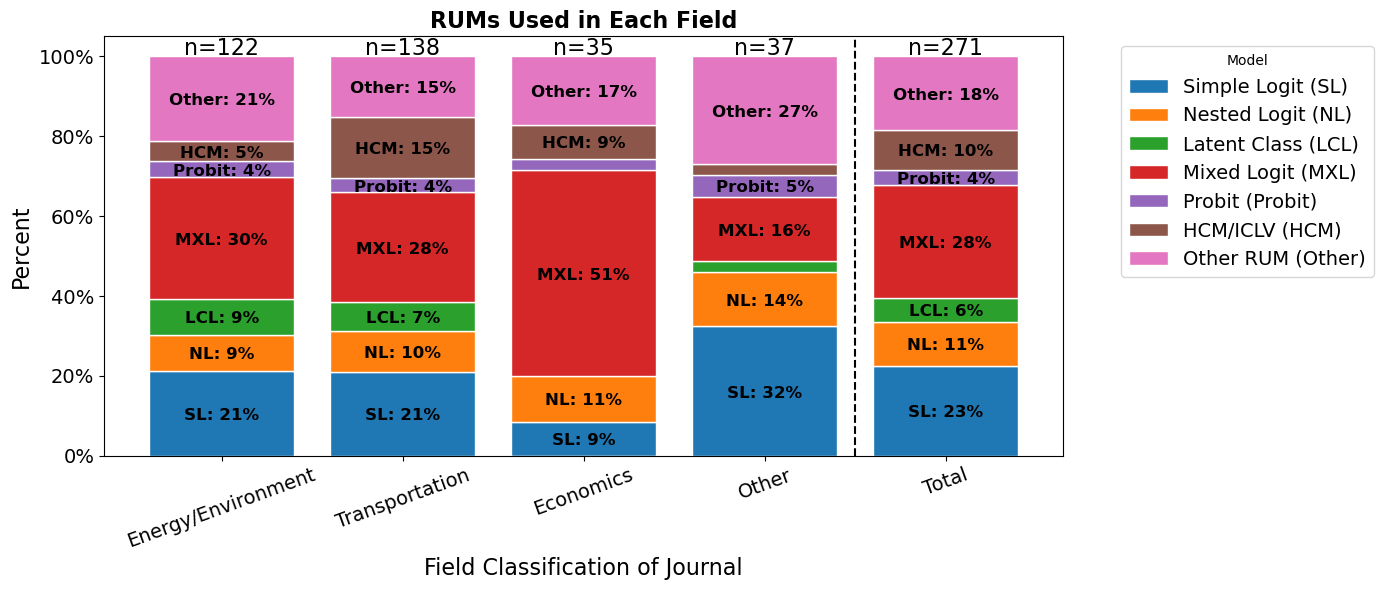

In [68]:
# Rename for plot
field_pct = field_pct.rename(columns={
    'Latent Class Logit': 'Latent Class',
    'Hybrid Choice Model': 'HCM/ICLV'
})

# Assuming 'field_pct' is your DataFrame with percentage values
field_pct.plot.bar(stacked=True, figsize=(14, 6), fontsize=14, edgecolor='white', legend=False, width=0.8)
ax = plt.gca()

# Formatting
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('RUMs Used in Each Field', fontsize=16, fontweight='bold')
plt.xlabel('Field Classification of Journal', fontsize=16)
plt.ylabel('Percent', fontsize=16)
plt.xticks(rotation=20)

# Cumulative sum for label positioning
cum_values = np.zeros(len(field_pct))

labels_rums = ['SL', 'NL', 'LCL', 'MXL', 'Probit', 'HCM', 'Other']

# Add labels within each stack
for i, col in enumerate(field_pct.columns):
    for j in range(len(field_pct)):
        value = field_pct[col][j]
        # Mid-point of the current bar segment
        mid_point = cum_values[j] + value / 2 - 0.5
        if value > 3:  # Only add labels to non-zero segments
            # label_text = f'{col}: {value:.0f}%'
            label_text = f'{labels_rums[i]}: {value:.0f}%'
            # label_text = f'{col}'
            ax.text(j, mid_point, label_text, ha='center', va='center', fontsize=12, color='black', fontweight='bold')
        cum_values[j] += value

# Total count above each bar
line_position = cum_values.max() - 1  # Adjust based on the max cumulative value
for i, total in enumerate(field_counts_df.sum()):
    ax.text(i, line_position, f'n={total}', ha='center', va='bottom', fontsize=16)

# Draw vertical line before the last bar
x_pos_for_line = len(field_pct.index) - 1.5
ax.axvline(x=x_pos_for_line, color='k', linestyle='--')

# Updating legend labels with abbreviations

handles, labels = ax.get_legend_handles_labels()
new_labels = [f'{labels[i]} ({labels_rums[i]})' for i in range(len(labels))]
plt.legend(handles, new_labels, title='Model', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

# Legend and layout
# plt.legend(title='RUM Class', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)
# plt.legend()
plt.tight_layout()
plt.show()
